**DonorsChoose**

DonorsChoose is a nonprofit that addresses the education funding gap through crowdfunding. Since 2000, they have facilitated $970 million in donations to 40 million students in the United States.

Features selected are listed below:

- essay

categorical features

- teacher_prefix
- project_grade_category
- school_state
- categories
- subcategories

numerical features

- price
- teacher_number_of_previously_posted_projects



##Loading Data

In [1]:

import pandas
data = pandas.read_csv('/content/drive/MyDrive/preprocessed_data.csv')
data.tail(10)



,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
109238,fl,mrs,grades_prek_2,24,1,math_science,mathematics,i teach 17 amazing students title one school m...,181.65
109239,in,ms,grades_6_8,1,1,music_arts,music visualarts,my students often worry things outside educati...,156.99
109240,ca,ms,grades_9_12,0,1,appliedlearning,college_careerprep,our students come multiple different backgroun...,313.96
109241,ca,ms,grades_3_5,1,1,appliedlearning specialneeds,charactereducation specialneeds,my students year love science engineering ever...,292.12
109242,ct,mrs,grades_prek_2,51,1,literacy_language,literature_writing,i teach first grade title i school although st...,330.87
109243,hi,mrs,grades_9_12,5,1,health_sports,teamsports,our day starts 100 students athletes low incom...,143.36
109244,nm,ms,grades_prek_2,3,1,appliedlearning,earlydevelopment other,my students range age four five years old atte...,268.57
109245,il,mrs,grades_3_5,0,1,math_science,appliedsciences environmentalscience,we title 1 school 650 total students our eleme...,399.00
109246,hi,mrs,grades_9_12,1,1,math_science,health_lifescience,i teach many different types students my class...,287.73
109247,ca,mrs,grades_prek_2,2,1,literacy_language,literacy literature_writing,my first graders eager learn world around they...,5.50


# Split the dataset 

In [2]:
# Split the dataset 

from sklearn.model_selection import train_test_split

data = data[0:5000];


X_train,X_test,Y_train,Y_test = train_test_split(data, data['project_is_approved'],test_size=0.33, random_state=42,stratify=data['project_is_approved'])
X_train, X_cv, y_train, y_cv = train_test_split(X_train, Y_train, test_size=0.33, stratify=Y_train);

print(X_test['teacher_prefix'].unique())

X_train.drop(['project_is_approved'], axis=1, inplace=True)
X_test.drop(['project_is_approved'], axis=1, inplace=True)
X_cv.drop(['project_is_approved'], axis=1, inplace=True)

['ms' 'mrs' 'mr' 'teacher']


In [3]:
print(data.columns)
print(X_train.shape, X_cv.shape, y_train.shape, y_cv.shape, X_test.shape,Y_test.shape)

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price'],
      dtype='object')
(2244, 8) (1106, 8) (2244,) (1106,) (1650, 8) (1650,)


##Make Data Model Ready: encoding essay

In [4]:
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

countVec = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=2000);

# fit only on train data
countVec.fit(X_train['essay'].values);

X_train_essay_bow = countVec.transform(X_train['essay'].values)
X_cv_essay_bow = countVec.transform(X_cv['essay'].values)
X_test_essay_bow = countVec.transform(X_test['essay'].values)
print(X_train_essay_bow.shape)

      

(2244, 2000)


In [5]:

vectorizer= TfidfVectorizer(ngram_range = (1,3));

vectorizer.fit(X_train['essay'].values);
X_train_tf_idf_essay = vectorizer.transform(X_train['essay'].values);
X_cv_tf_idf_essay = vectorizer.transform(X_cv['essay'].values);
X_test_tf_idf_essay = vectorizer.transform(X_test['essay'].values);

##Make Data Model Ready: encoding numerical, categorical features

In [6]:

# print(data.columns)
vect = CountVectorizer();

vect.fit(X_train['school_state'].values);
X_train_school_state_ohe = vect.transform(X_train['school_state'].values);
X_cv_school_state_ohe = vect.transform(X_cv['school_state'].values);
X_test_school_state_ohe = vect.transform(X_test['school_state'].values);
print(vect.get_feature_names());


['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [7]:
vect = CountVectorizer();
vect.fit(X_train['teacher_prefix'].values);
X_train_teacher_prefix_ohe = vect.transform(X_train['teacher_prefix'].values);
X_cv_teacher_prefix_ohe = vect.transform(X_cv['teacher_prefix'].values);
X_test_teacher_prefix_ohe = vect.transform(X_test['teacher_prefix'].values);
print(vect.get_feature_names());

['mr', 'mrs', 'ms', 'teacher']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [8]:
vect = CountVectorizer();
vect.fit(X_train['project_grade_category'].values);
X_train_project_grade_category_ohe = vect.transform(X_train['project_grade_category'].values);
X_cv_project_grade_category_ohe = vect.transform(X_cv['project_grade_category'].values);
X_test_project_grade_category_ohe = vect.transform(X_test['project_grade_category'].values);
print(vect.get_feature_names());


['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
vect = CountVectorizer();
vect.fit(X_train['clean_categories'].values);
X_train_clean_categories_ohe = vect.transform(X_train['clean_categories'].values);
X_cv_clean_categories_ohe = vect.transform(X_cv['clean_categories'].values);
X_test_clean_categories_ohe = vect.transform(X_test['clean_categories'].values);
print(vect.get_feature_names());

['appliedlearning', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [10]:
vect = CountVectorizer();
vect.fit(X_train['clean_subcategories'].values);
X_train_clean_subcategories_ohe= vect.transform(X_train['clean_subcategories'].values);
X_cv_clean_subcategories_ohe = vect.transform(X_cv['clean_subcategories'].values);
X_test_clean_subcategories_ohe= vect.transform(X_test['clean_subcategories'].values);


In [11]:
# Normailzer on numeric values
from sklearn.preprocessing import Normalizer
norm = Normalizer();

norm.fit(X_train['price'].values.reshape(1, -1).reshape(-1,1));
X_train_price_norm = norm.transform(X_train['price'].values.reshape(1, -1).reshape(-1,1));
X_cv_price_norm = norm.fit_transform(X_cv['price'].values.reshape(1,-1).reshape(-1,1));
X_test_price_norm = norm.fit_transform(X_test['price'].values.reshape(1,-1).reshape(-1,1));

In [12]:
norm = Normalizer();
norm.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1).reshape(-1,1));
X_train_teacher_number_of_previously_posted_projects_Norm = norm.fit_transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1).reshape(-1,1));
X_cv_teacher_number_of_previously_posted_projects_Norm = norm.fit_transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1).reshape(-1,1));
X_test_teacher_number_of_previously_posted_projects_Norm = norm.fit_transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1).reshape(-1,1));



### Perform Hyperparameter Tuning

In [13]:
# Perform Hyperparameter Tuning.

from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from scipy.sparse import hstack
import matplotlib.pyplot as plt 

naiveCLf = GaussianNB();
parameters = {'var_smoothing':[0.1, 10, 100, 51, .004]};

print(naiveCLf.get_params().keys())

X_tr = hstack((X_train_essay_bow,X_train_price_norm,X_train_school_state_ohe,X_train_project_grade_category_ohe,
               X_train_clean_categories_ohe,X_train_clean_subcategories_ohe,X_train_teacher_prefix_ohe,X_train_teacher_number_of_previously_posted_projects_Norm )).tocsr()
X_cr = hstack((X_cv_essay_bow,X_cv_price_norm,X_cv_school_state_ohe,X_cv_project_grade_category_ohe,
               X_cv_clean_categories_ohe,X_cv_clean_subcategories_ohe,X_cv_teacher_prefix_ohe,X_cv_teacher_number_of_previously_posted_projects_Norm )).tocsr()
X_tst =  hstack((X_test_essay_bow,X_test_price_norm,X_test_school_state_ohe,X_test_project_grade_category_ohe,
               X_test_clean_categories_ohe,X_test_clean_subcategories_ohe,X_test_teacher_prefix_ohe,X_test_teacher_number_of_previously_posted_projects_Norm )).tocsr()
clf = RandomizedSearchCV(naiveCLf, parameters , verbose =1 ,cv =3, scoring ='roc_auc', return_train_score= True );


print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_tst.shape, Y_test.shape)

clf.fit(X_tr.toarray(),y_train);

print(clf.cv_results_);


train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

print(clf.best_params_);



dict_keys(['priors', 'var_smoothing'])
Final Data matrix
(2244, 2095) (2244,)
(1106, 2095) (1106,)
(1650, 2095) (1650,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


{'mean_fit_time': array([0.05812152, 0.04905605, 0.05156891, 0.05096316, 0.0502855 ]), 'std_fit_time': array([0.01019838, 0.00039941, 0.00180497, 0.001296  , 0.00139542]), 'mean_score_time': array([0.02268171, 0.02445698, 0.02275141, 0.02215179, 0.02713768]), 'std_score_time': array([0.00102367, 0.00427668, 0.0006003 , 0.00099902, 0.00391811]), 'param_var_smoothing': masked_array(data=[0.1, 10, 100, 51, 0.004],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'var_smoothing': 0.1}, {'var_smoothing': 10}, {'var_smoothing': 100}, {'var_smoothing': 51}, {'var_smoothing': 0.004}], 'split0_test_score': array([0.56898148, 0.56601852, 0.5645216 , 0.56490741, 0.59455247]), 'split1_test_score': array([0.60591049, 0.59365741, 0.59233025, 0.59242284, 0.61088735]), 'split2_test_score': array([0.58088359, 0.54805882, 0.54562566, 0.54577869, 0.62569054]), 'mean_test_score': array([0.58525852, 0.56924492, 0.5674925 , 0.56770298, 0.61

##Plotting the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot

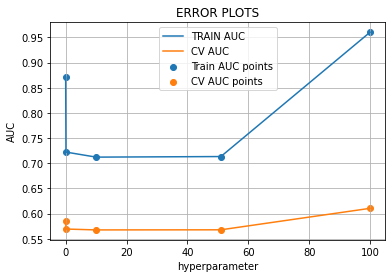

In [14]:
k=sorted(parameters['var_smoothing'],reverse=False);
plt.plot(k,train_auc,label='TRAIN AUC ');
plt.plot(k,cv_auc,label='CV AUC ');

plt.scatter(k, train_auc, label='Train AUC points')
plt.scatter(k, cv_auc, label='CV AUC points')

plt.legend();
plt.xlabel("hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

##Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score ,auc,accuracy_score
from sklearn.metrics import roc_curve, auc
import pandas as pd
from scipy.sparse import vstack 
import numpy as np

#  so after hyperparameter training , the best param is 0.004 
best_param = 0.004;


clf = MultinomialNB(alpha = best_param);
# df = pd.DataFrame.sparse.from_spmatrix(X_tr.toarray,X_cr);
X_train_final = vstack((X_tr,X_cr));

Y_train_final = pd.concat([y_train, y_cv]);


clf.fit(X_train_final,Y_train_final);
Yred = clf.predict(X_tst)


YTrain_Predicted_Proba = clf.predict_proba(X_train_final)[:,1];
YTest_Predicted_Proba = clf.predict_proba(X_tst)[:,1];



train_fpr, train_tpr, tr_thresholds   = roc_curve(Y_train_final,YTrain_Predicted_Proba);
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test,YTest_Predicted_Proba);


print(str(auc(train_fpr, train_tpr)));
print(str(auc(test_fpr, test_tpr)));

0.8933996168582375
0.6297287284402915


### Plot the ROC-AUC curves using the probability predictions made on train and test data.

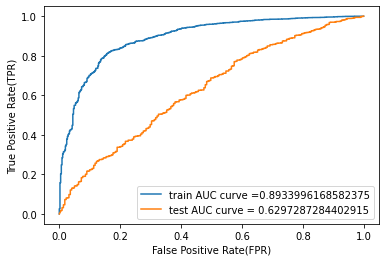

In [16]:

plt.plot(train_fpr,train_tpr,label='train AUC curve ='+ str(auc(train_fpr, train_tpr)));
plt.plot(test_fpr,test_tpr,label='test AUC curve = '+str(auc(test_fpr, test_tpr)));
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.show()

